In [1]:
# Import libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) 


# Read in data 

df = pd.read_csv("nba_1996-2019.csv")

In [3]:
df.dtypes

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                    int64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [4]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [4]:
# Dropping unnecessary column

df.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
# Checking for missing values 

df.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [7]:
# Rounding player weight to 2 decimal places 

df["player_weight"] = df["player_weight"].round(decimals = 2)

In [8]:
# Descriptive Statistics 

df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526526,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526598,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.330000,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.720000,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790000,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.860000,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.290000,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [12]:
# Correlation 

corr_mtx = df.corr()

corr_mtx

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.011678,0.052119,0.049585,0.002873,0.031416,0.086853,0.096820,-0.060633,0.014843,-0.127949,0.022131,0.066615
player_height,-0.011678,1.000000,0.827301,-0.005329,-0.060524,0.422356,-0.457367,-0.008723,0.590928,0.615384,-0.109527,0.069618,-0.625888
player_weight,0.052119,0.827301,1.000000,0.012496,-0.030655,0.437403,-0.387343,0.000612,0.604062,0.607750,-0.071879,0.062474,-0.540902
gp,0.049585,-0.005329,0.012496,1.000000,0.538367,0.468870,0.385596,0.254051,-0.020495,0.060785,0.138849,0.377679,0.134810
pts,0.002873,-0.060524,-0.030655,0.538367,1.000000,0.622818,0.656564,0.221002,-0.124345,0.050246,0.638037,0.378961,0.330269
reb,0.031416,0.422356,0.437403,0.468870,0.622818,1.000000,0.231678,0.193027,0.410619,0.611215,0.225592,0.312843,-0.078836
ast,0.086853,-0.457367,-0.387343,0.385596,0.656564,0.231678,1.000000,0.167207,-0.346569,-0.207846,0.387400,0.177817,0.806682
net_rating,0.096820,-0.008723,0.000612,0.254051,0.221002,0.193027,0.167207,1.000000,0.056778,0.043275,0.000476,0.318076,0.061723
oreb_pct,-0.060633,0.590928,0.604062,-0.020495,-0.124345,0.410619,-0.346569,0.056778,1.000000,0.557682,-0.101293,0.058805,-0.438385
dreb_pct,0.014843,0.615384,0.607750,0.060785,0.050246,0.611215,-0.207846,0.043275,0.557682,1.000000,-0.021448,0.102571,-0.338098


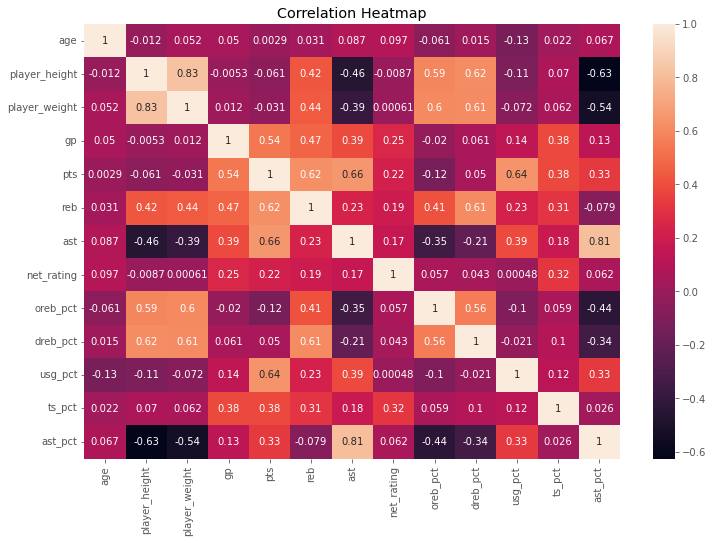

In [14]:
# Correlation heatmap to display strong correlations

sns.heatmap(corr_mtx, annot = True)

plt.title("Correlation Heatmap")

plt.show()

In [ ]:
# Insights: 
# player_height and player_weight have strong negative correlation with both ast and ast_pct; taller and heavier players tend to handle the ball less
# players with a higher usg_pct score more points
# height and weight indicate strong correlation with rebounding percentage; bigger players rebound more
# higher pts leads to higher ast; ball handlers that score often seem to get teammates more involved 